In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

In [8]:
def ShowImage(img):
    plt.axis('off')
    plt.imshow(img, cmap='gray')

In [9]:
def histogram(img):
    row, col = img.shape
    hist = [0.0] * 256
    for i in range(row):
        for j in range(col):
            hist[img[i,j]] += 1
    return np.array(hist)

In [10]:
def ResizeImage(img, scale):
    row, col = img.shape
    dim = (int(col*scale), int(row*scale))
    return cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

In [11]:
img = cv2.imread(r'C:\Users\Thichanon\Desktop\University\COS3401\Week7-8\images\cameraman.tif', 0)
print(img.shape)

(512, 512)


In [12]:
img = ResizeImage(img, 0.5)
print(img.shape)

(256, 256)


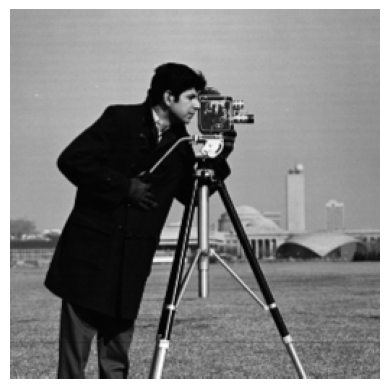

In [13]:
ShowImage(img)

In [14]:
hist = histogram(img)

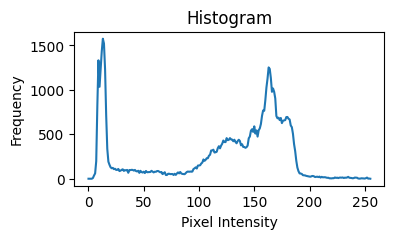

In [16]:
plt.figure(figsize=((4,2)))
plt.plot(hist)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

In [17]:
prob = hist/np.sum(hist)

In [18]:
thresh = 10

In [19]:
w0 = np.sum(prob[:thresh]) + 0.00000001
w1 = np.sum(prob[thresh:]) + 0.00000001